In [1]:
%matplotlib notebook

from combine.philip_zb_w7xt_version2 import gen_grid
from matplotlib import pyplot as plt
import ipywidgets as widgets
import numpy as np

from combine.quick_g import multi_bump
import combine.grid_analyze_version2 as ga

In [7]:
def widget_g_plot_exp(g, phi=-1, title=None, widget=False, sharex=True, sharey=True):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_aspect("equal")
    if(title is not None): ax.set_title(title)
    fig.tight_layout()
    
    def g_plot(phi):
        ax.clear()
        print(g.shape, phi)
        R, z, _ = np.transpose(g[:,:,phi,:], (2,0,1))
        ax.plot(R[:,::10], z[:,::10], c="blue", lw=.7, zorder=100)
        ax.plot(R.T[:,::10], z.T[:,::10], c="red", lw=.7, zorder=100)
        ax.plot(R,z, c="C0", lw=0.3, zorder=101)
        ax.plot(R.T,z.T, c="magenta", lw=0.3, zorder=101)
        # ax.plot(R.T[23], z.T[23], c="C2", lw=1, zorder=100) # TODO Delete
    
    if widget:
        phi = widgets.IntSlider(min=0, max=g.shape[2]-1, value=0, step=1)
        widgets.interact(g_plot, phi = phi)
    else:
        g_plot(phi)

In [8]:
constants = {"NirS": 5, "NirC": 5, "NirN": 10,  # in -> outside cell number 
             "Niphalf": 50, "is_bean": True,  # half pol cell number
             "eq_space": True, "eq_space_vessel": True, "Nit": 37,
             "zoidpol": False, "trace_angle": 15, # angle is int in [0,36]
             "center_delta_R": .15}

In [9]:
# shift spacings around
size = constants["Niphalf"]*2+1, constants["Nit"]
scales = [0.25]
mus = [ [0.2,0] ]
covs = [
    [[20,0],[0,10]]
]
        
# constants["vessel_pdf"] = multi_bump(size)
constants["vessel_pdf"] = multi_bump(size, scales, mus, covs)

In [10]:
g = gen_grid(constants)
# eqi, eqo, zp = int(constants['eq_space']), int(constants['eq_space_vessel']), int(constants['zoidpol'])
# ta = constants['trace_angle']
# g = gen_grid(constants, save=f"../grids/g_eqi{eqi}_eqo{eqo}_zp{zp}_ta{ta}.npy")

File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


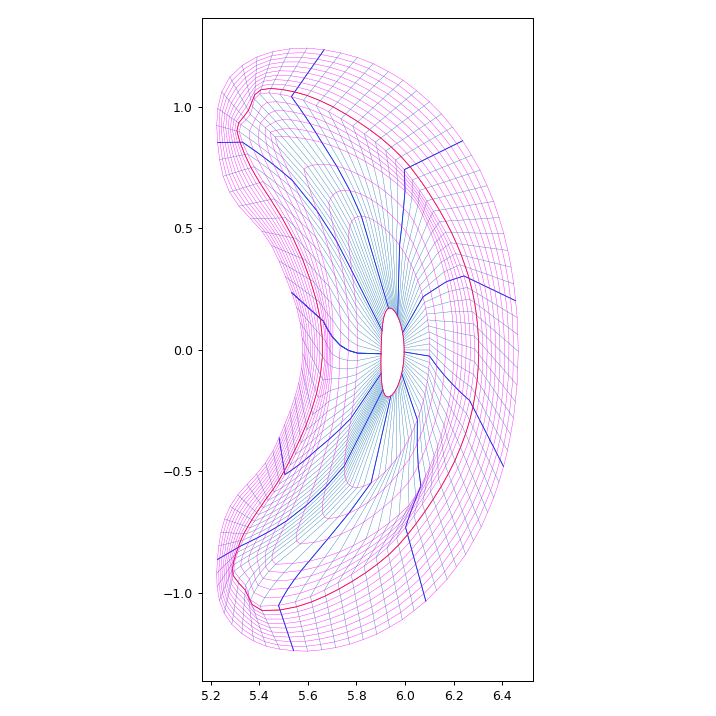

interactive(children=(IntSlider(value=0, description='phi', max=36), Output()), _dom_classes=('widget-interact…

In [11]:
# lg = np.load("../grids/g_eqi1_eqo0_zp1_ta10.npy")
widget_g_plot_exp(g, phi=0, widget=True)

<IPython.core.display.Javascript object>


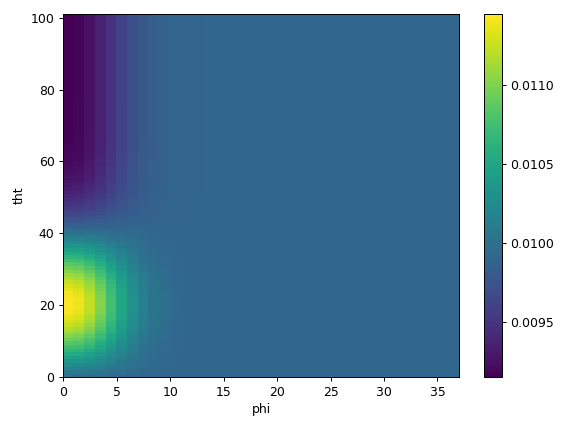

In [12]:
norm = constants["vessel_pdf"] / np.sum(constants["vessel_pdf"], axis=0)
fig, ax = plt.subplots()
cb = ax.pcolormesh(norm)
ax.set_ylabel("tht"); ax.set_xlabel("phi")
fig.colorbar(cb)
fig.tight_layout()

In [ ]:
constants["vessel_pdf"].shape